In [1]:
%%capture
!pip install --upgrade pip matplotlib scipy  # Upgrade required for Azure notebook
!pip install git+git://github.com/cloudbopper/synmod  # For Colab

In [2]:
%%javascript
// Disables truncation of output window
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Synthesis config - these can alternatively be provided via command-line
import argparse
args = argparse.Namespace()
args.num_instances = 10
args.num_features = 10
args.sequence_length = 20
args.model_type = "regressor"  # regressor/classifier
args.fraction_relevant_features = 0.5
args.window_independent = False  # Sequence dependence on windows
args.output_dir = "synmod_outputs"
args.seed = 42
args.num_interactions = 0
args.include_interaction_only_features = False
# Don't alter:
args.synthesis_type = "temporal"
args.visualize_data = True
args.notebook = True

In [4]:
# Synthesize data and model
from synmod import master
features, data, model = master.pipeline(args)

Model details:

Aggregation function: Average
Polynomial: 0.761139701990353*x2 + 0.786064305276954*x4 + 0.128113632675546*x5 + 0.450385937895567*x6 + 0.370798024232581*x8

----------------

Feature generators and time series:

----------------

[Feature 2]
Generator:


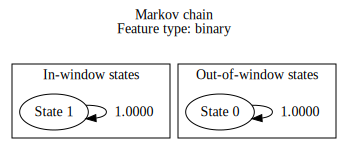

Time series:


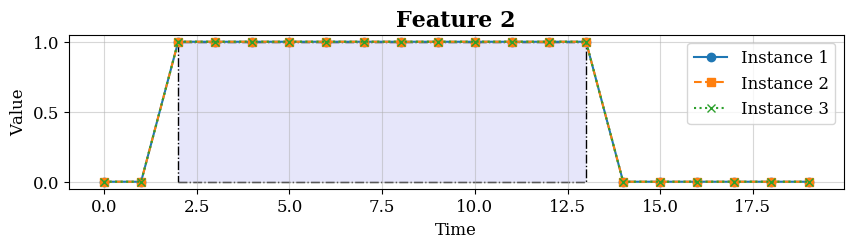


----------------

[Feature 4]
Generator:


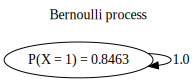

Time series:


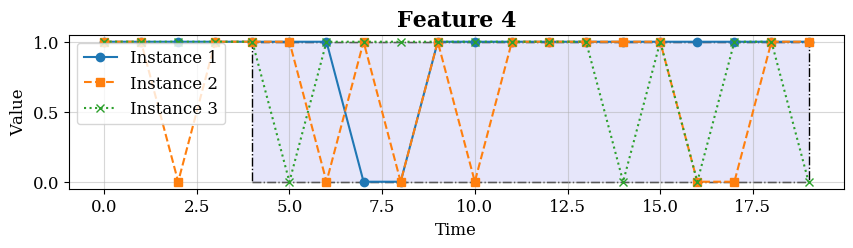


----------------

[Feature 5]
Generator:


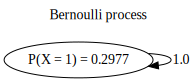

Time series:


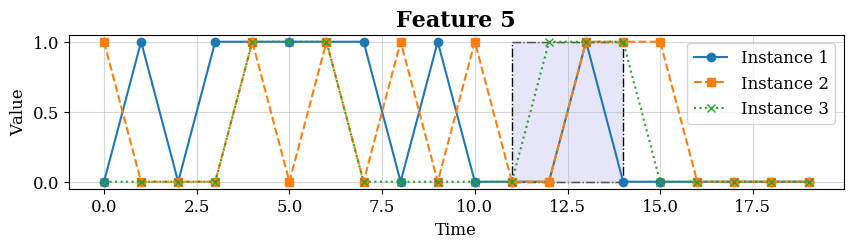


----------------

[Feature 6]
Generator:


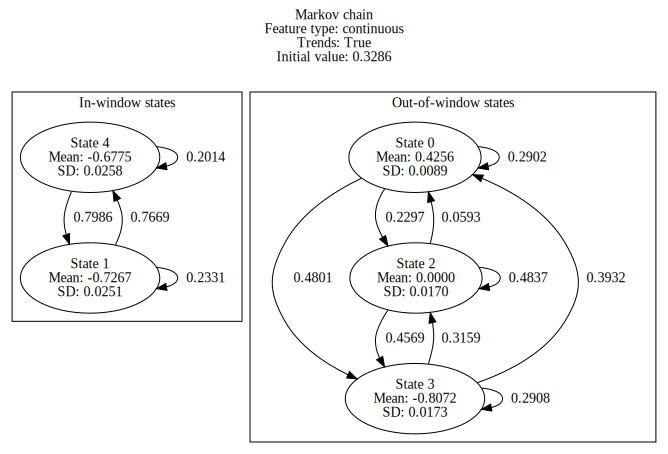

Time series:


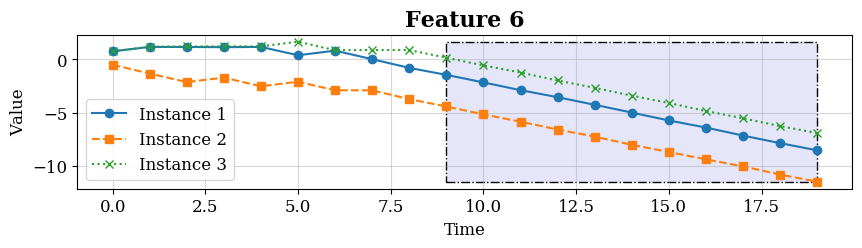


----------------

[Feature 8]
Generator:


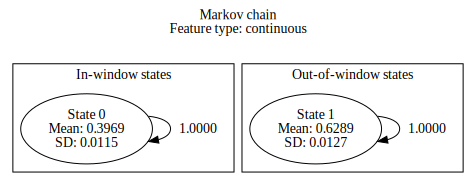

Time series:


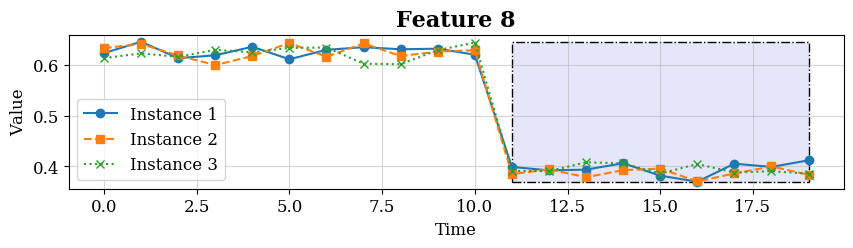

In [5]:
"""Visualize synthesized data"""

import itertools
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Visualization config
max_instances = 3  # Maximum number of instances to display per feature
max_features = 10  # Maximum number of features to display
display_irrelevant_features = False  # Flag to enable displaying irrelavant features


def visualize_data(args, features, data, model):
    """Visualize sequence data"""
    print("Model details:\n")
    print("Aggregation function: %s" % type(model._operation).__name__)
    print("Polynomial: %s" % model.sym_polynomial_fn)
    print("\n----------------\n\nFeature generators and time series:")
    # Select instances and features to visualize
    data = data[:min(max_instances, data.shape[0])]
    if not display_irrelevant_features:
        features = [feature for feature in features if frozenset({int(feature.name)}) in model.relevant_feature_map]
    features = features[:min(len(features), max_features)]
    # Visualize generators and time-series for each feature
    for feature in features:
        fid = int(feature.name)
        generator_graph = feature.generator.graph()
        plot_time_series(feature, data[:, fid])
        print("\n----------------\n\n[Feature %d]" % fid)
        print("Generator:")
        display(generator_graph)
        print("Time series:")
        plt.show()


def plot_time_series(feature, data):
    """Plot time series for single feature"""
    # Config
    plt.style.use('default')
    matplotlib.rcParams.update({"text.usetex": False})
    matplotlib.rcParams.update({"font.family": "serif", "font.size": 12})
    matplotlib.rcParams.update({"axes.edgecolor": "black", "axes.labelsize": 12, "axes.grid": True})
    matplotlib.rcParams.update({"axes.titlesize": 16, "axes.titleweight": "bold"})
    matplotlib.rcParams.update({"grid.color": "b0b0b0", "grid.linestyle": "-", "grid.alpha": 0.5})
    plt.figure(num=1, figsize=(10, 2))
    # Series
    timestamps = np.arange(data.shape[1])
    markers = itertools.cycle(('o', 's', 'x', ',', '.')) 
    linestyles = itertools.cycle(('-', '--', ':'))
    for i, seq in enumerate(data):
        plt.plot(timestamps, seq, marker=next(markers), linestyle=next(linestyles), label="Instance %d" % (i + 1))
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.title("Feature %s" % feature.name)
    plt.legend()
    # Window
    left, right = feature.window
    width = right - left
    bottom = np.min(data)
    height = np.max(data) - bottom
    rect = plt.Rectangle((left, bottom), width, height, facecolor="lavender", edgecolor="black",
                         linestyle="-.")
    ax = plt.gca()
    ax.add_patch(rect)

visualize_data(args, features, data, model)
